In [1]:
import keras
import csv
import PIL.Image
import numpy as np
from skimage import data, io, filters
from keras.utils import to_categorical

/home/mike/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
with open("train.csv") as f:
    areader = csv.reader(f, delimiter=' ')
    rows = []
    for row in areader:
        rows.append(row)

    

In [3]:
lst = []
for row in rows[1:]:
    lst.append([float(x) for x in row[0].split(',')])
    
ar = np.array(lst)



In [4]:
print(ar.shape)

(42000, 785)


model.predict(ar[100:110])

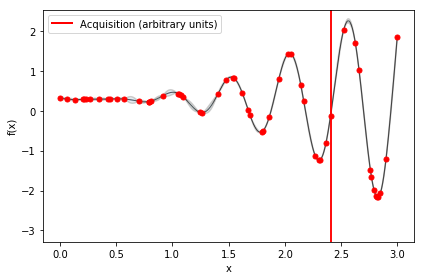

In [5]:
from GPyOpt.methods import BayesianOptimization
import numpy as np

# --- Define your problem
def f(x): return (6*x-2)**2*np.sin(12*x-4)
domain = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,3)}]

# --- Solve your problem
myBopt = BayesianOptimization(f=f, domain=domain)
myBopt.run_optimization(max_iter=50)
myBopt.plot_acquisition()

In [6]:
def densemodel(w, x, y, z):
    X_input = keras.Input(shape=(784,))
    X = keras.layers.Dense(w, activation='tanh')(X_input)
    X = keras.layers.Dense(x, activation='softmax')(X)
    X = keras.layers.Dense(y, activation='softmax')(X)
    X = keras.layers.Dense(z, activation='softmax')(X)
    X = keras.layers.Dense(10, activation='softmax')(X)
    model = keras.Model(inputs = X_input, outputs = X)
    return model


def testhyp(params):
    model = densemodel(int(params[0,0]), int(params[0,1]), int(params[0,2]), int(params[0,3]))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    f = model.fit(ar[1000:, 1:], to_categorical(ar[1000:, 0])).history['loss'][0]
    print(model.summary())
    return f

    

In [7]:
domains = [{'name': 'var_1', 'type': 'discrete', 'domain': range(16,2048)},
         {'name': 'var_2', 'type': 'discrete', 'domain': range(16,2048)},
         {'name': 'var_3', 'type': 'discrete', 'domain': range(16,2048)},
         {'name': 'var_4', 'type': 'discrete', 'domain': range(16,2048)}]
myBopt = BayesianOptimization(f=testhyp, domain=domains)
myBopt.run_optimization(max_iter=5)

Epoch 1/1
 4608/41000 [==>...........................] - ETA: 2:12 - loss: 2.3028 - acc: 0.1042

KeyboardInterrupt: 

In [24]:
#model.predict(ar[0:12, 1:])

In [22]:
#io.imshow(np.reshape(ar[2][1:], (28,28)))

In [21]:
#ar[11]

In [23]:
#io.imshow(np.reshape(ar[999][1:], (28,28)))
#28**2